<a href="https://colab.research.google.com/github/pavi-1994/telecom_churn_analysis/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [1]:
# importing the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path='/content/drive/MyDrive/almabetter/python_for_datascience/EDA _capstone_project/Telecom Churn.csv'

In [4]:
#importing the csv file using pandas read_csv 
telecom_df=pd.read_csv(file_path)
#print the top five rows
telecom_df.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [5]:
#check the columns present in the telecom_df
print(f'Feature of telecom_df :\n {telecom_df.columns}')

Feature of telecom_df :
 Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


In [6]:
#check the shape of telecom_df
print(f'shape of the telecom_df : {telecom_df.shape}')

shape of the telecom_df : (3333, 20)


In [7]:
#check no of unique element present in each feature (columns)
telecom_df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

#### **Telecom Churn Datasets**

Each row represents a customer; each column contains customer’s attributes. The datasets have the following attributes or features:

**State**: data_type is string and contains 51 unique states of united states of America

**Account** length: data_type is integer and it is about acount length and has 212 uinque account length

**Area code**: data_type is integer. There are only 3 area code which are 408-San Jose ,415- San Francisco,510-okland.

**International plan**:data_type is string.subscription for Internatinal Plan the customer has subscribed for this plan or not 

**Voice mail plan**: data_type is string. subscription for Voice Mail Plan the customer has subscribed for this plan or not 

**Number vmail messages**:data_type is integer. Number of Voice Mail Messages 

**Total day minutes**:data_type is float.Total Number of Minutes Spent By Customers in daytime

**Total day calls**:data_type is integer.Total Number of Calls made by Customer in  daytime

**Total day charge**:data_type is float.otal Charge to the Customers in daytime 

T**otal eve minutes**:data_type is float. Total Number of Minutes Spent By Customers in evening

**Total eve calls**:data_type is integer. Total Number of calls made By Customers in evening

**Total eve charge**:data_type is float. Total Charge to the Customers in the evening

**Total night minute**s:data_type is float.  Total Number of Minutes Spent By Customers in night

**Total night calls**:data_type is integer. Total Number of calls made By Customers in night


**Total night charge**:data_type is float. Total Charge to the Customers in neight

**Total intl minutes**:data_type is float. total initial minutes

**Total intl calls**:data_type is integer. total initial calls 

**Total intl charge**:data_type is float. total charge for initial calls

**Customer service calls**:data_type is integer. number of  calls made by cutomers to service providers

**Churn**: data_type is bool. where the customer has churned or not

The "telecom_df" dataset contains 3333 rows (customers) and 20 columns (features).

The "Churn" column is the target to predict.

In [8]:
## check the details about the telecom_df dataset
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

from above analysis we come to know that there is no null value present in the dataset. but still we will check using following method

## checking for missing values

In [9]:
#checking total count of the null value present in the telecom_df
missing_percentage = telecom_df.isnull().sum() / telecom_df.shape[0] * 100
missing_percentage.sort_values (ascending=False)

State                     0.0
Account length            0.0
Customer service calls    0.0
Total intl charge         0.0
Total intl calls          0.0
Total intl minutes        0.0
Total night charge        0.0
Total night calls         0.0
Total night minutes       0.0
Total eve charge          0.0
Total eve calls           0.0
Total eve minutes         0.0
Total day charge          0.0
Total day calls           0.0
Total day minutes         0.0
Number vmail messages     0.0
Voice mail plan           0.0
International plan        0.0
Area code                 0.0
Churn                     0.0
dtype: float64

## **checking for presence of duplicates**

In [10]:
print("\n\npresence of duplicated  rows in telecom_df:  "+str(telecom_df.duplicated().sum()))



presence of duplicated  rows in telecom_df:  0


## **To understand basic statistical distribution of dataset**

In [11]:

# calling describe method
desc = telecom_df.describe( include='all')
desc

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


## **Exploratory data analysis**

### Univarient analysis:

##### 1) **Churn**

In [12]:
telecom_df["Churn"].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

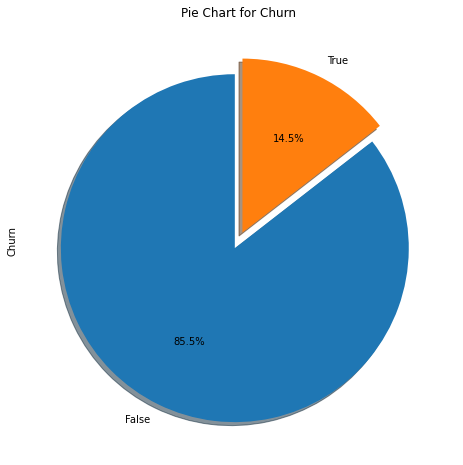

In [13]:
#To get the pie Plot to analyze churn
telecom_df['Churn'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8))
plt.title('Pie Chart for Churn')
plt.show()


we can see here that out off 3333 the total number of 483 i.e 14.5% people are changed their service provider. Also we can say that this dataset is baised dataset

#### 2.**Customer service calls**

In [14]:
telecom_df["Customer service calls"].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

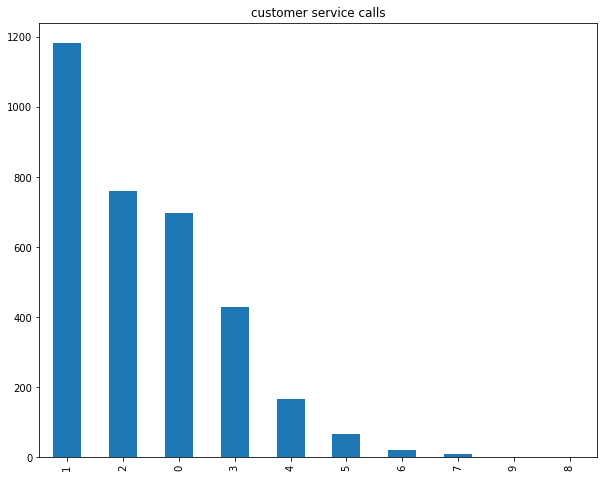

In [15]:
telecom_df["Customer service calls"].value_counts().plot(kind='bar')
plt.title('customer service calls')
plt.show()

##### From above bar graph we can see that most of the people who contacted customer service center only once(1181), twice(759) or thrice(429. we can also see that there are few people (around 267) who contacted more than 4 times and few people(697) who never approached to customer service center

there is need of improvement of customer service call quality service from telecome company 

In [16]:
# by using group by
####churn_telecom_df=telecom_df[["Churn","Customer service calls"]]
####churn_telecom_df.groupby(["Churn","Customer service calls"])["Customer service calls"].count().T
# or by using cross tab
pd.crosstab(telecom_df["Churn"], telecom_df["Customer service calls"]).T


Churn,False,True
Customer service calls,,
0,605,92
1,1059,122
2,672,87
3,385,44
4,90,76
5,26,40
6,8,14
7,4,5
8,1,1


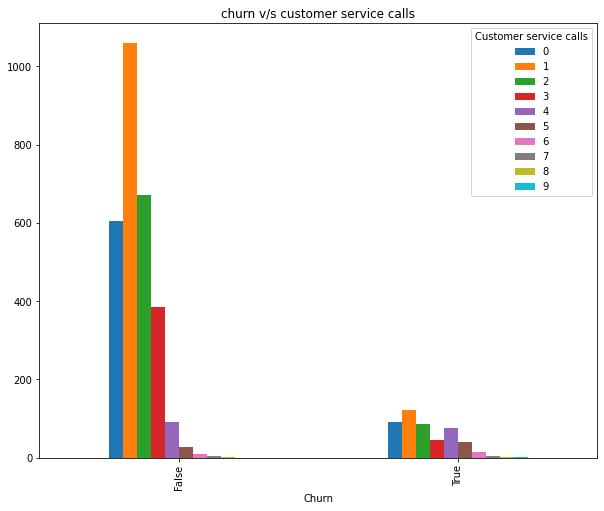

In [17]:
pd.crosstab(telecom_df["Churn"], telecom_df["Customer service calls"]).plot(kind='bar')
plt.title('churn v/s customer service calls')
plt.show()

##### from above analysis we can see that the people who contacted customer call center and not contacted all of them churned the telecom company. so  we cannot decide only on the basis of  customer service calls 

### 3.**State**

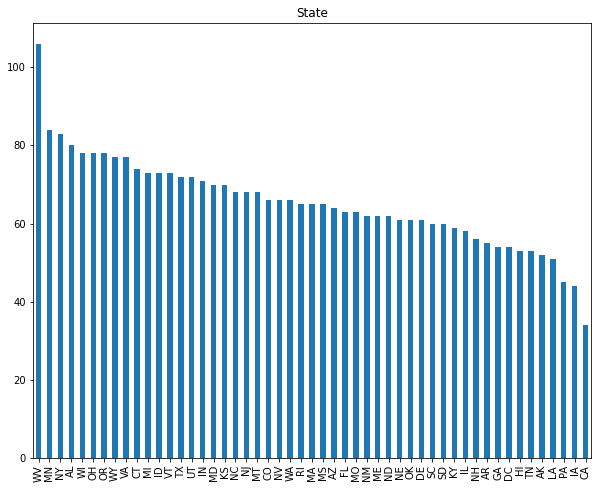

In [18]:
telecom_df["State"].value_counts().plot(kind='bar')
plt.title('State')
plt.show()

maximum number of customer of telecom company belongs to WV and mininmum for CA

#### **Bivarient analysis with state and churn**

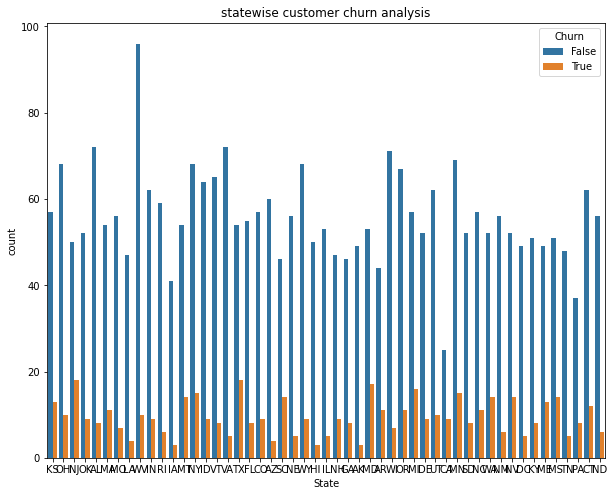

In [19]:
sns.countplot(x ='State', hue = "Churn", data = telecom_df)
plt.title('statewise customer churn analysis')
plt.show()

customers states NJ, MT, NY,  TX,  SC, MD, MI, MN, WA, NV, ME, MS, CT are headed towards the other service provider 

#### 4.**areacode**

In [20]:
telecom_df["Area code"].value_counts()

415    1655
510     840
408     838
Name: Area code, dtype: int64

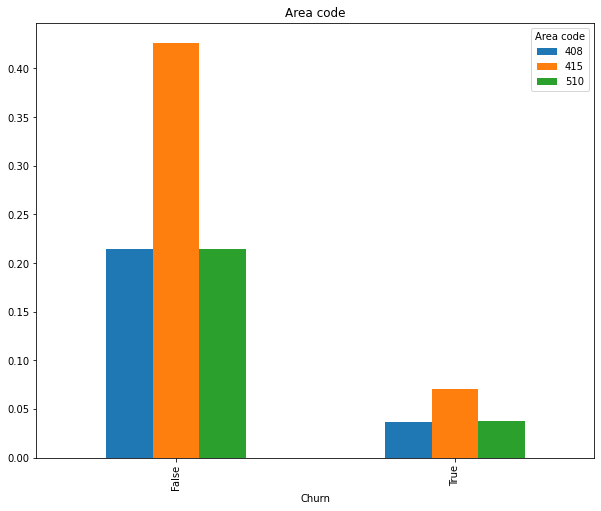

In [21]:
pd.crosstab(telecom_df["Churn"], telecom_df["Area code"], normalize=True).plot(kind='bar')
plt.title('Area code')
plt.show()

#### **Bivarient analysis with area_code and churn**

In [22]:
pd.crosstab(telecom_df["Churn"], telecom_df["Area code"], normalize=True)

Area code,408,415,510
Churn,,,
False,0.214821,0.425743,0.214521
True,0.036604,0.070807,0.037504


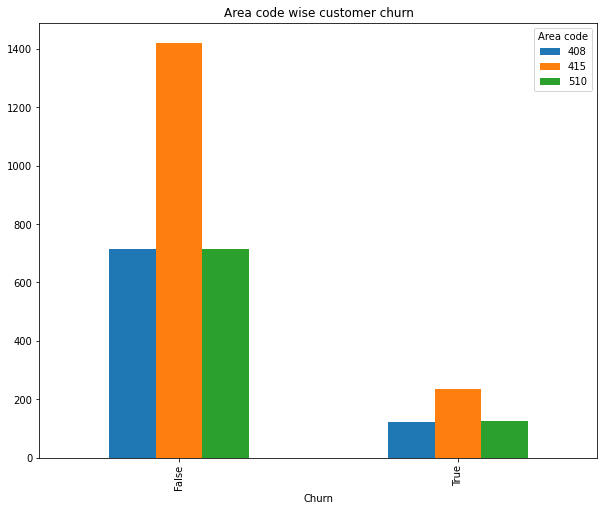

In [23]:
pd.crosstab(telecom_df["Churn"], telecom_df["Area code"]).plot(kind='bar')
plt.title('Area code wise customer churn')
plt.show()

 most of the customer who changed their service provider belongs to area code 415 i.e around 7%  remaing two area code has churn rate around 3.6%


### 5. **International plan**

In [24]:
telecom_df["International plan"].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

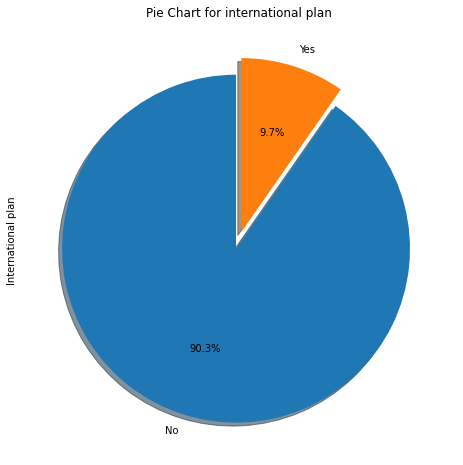

In [25]:
telecom_df["International plan"].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8))
plt.title('Pie Chart for international plan')
plt.show()

we can see that only 9.7% of people are subscribed to intenational paln



In [26]:
pd.crosstab(telecom_df["Churn"], telecom_df["International plan"],normalize= True)


International plan,No,Yes
Churn,,
False,0.79928,0.055806
True,0.10381,0.041104


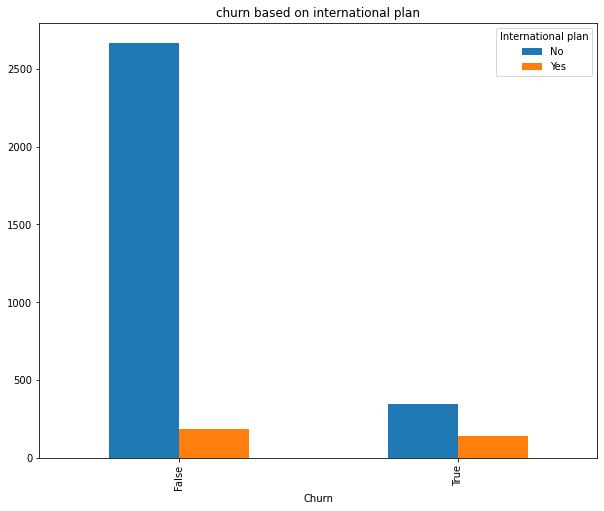

In [27]:
pd.crosstab(telecom_df["Churn"], telecom_df["International plan"]).plot(kind="bar")
plt.title('churn based on international plan')
plt.show()

#### Out of 9.7% of people who were subscribed to intenational plan 4.1% people are churned  and 5.5% people still continued their subscriptions also we can say that the rate of churn of customer who subscribed for the international plan is comparitively more than customer who didn't subcribed


###  6 **Voice mail plan**

In [28]:
telecom_df['Voice mail plan'].value_counts()

No     2411
Yes     922
Name: Voice mail plan, dtype: int64

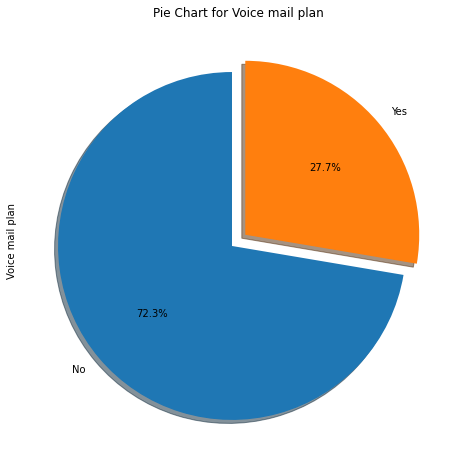

In [29]:
telecom_df['Voice mail plan'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8))
plt.title('Pie Chart for Voice mail plan')
plt.show()

27.7% of customers has subscribed for Voice mail plan

In [30]:
pd.crosstab(telecom_df["Churn"], telecom_df["Voice mail plan"],normalize= True)


Voice mail plan,No,Yes
Churn,,
False,0.602460,0.252625
True,0.120912,0.024002


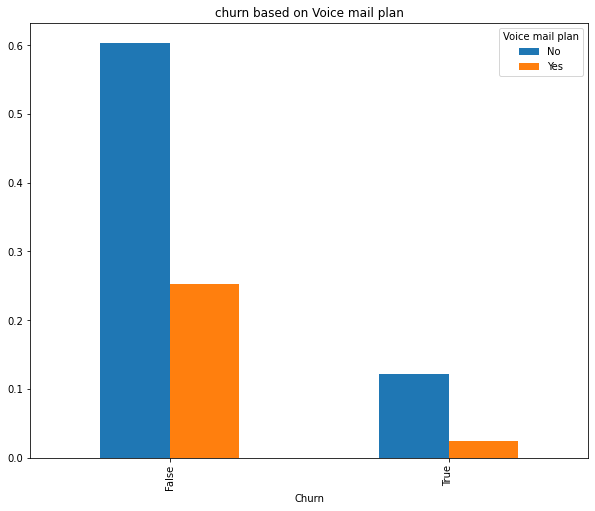

In [31]:
pd.crosstab(telecom_df["Churn"], telecom_df["Voice mail plan"],normalize= True).plot(kind='bar')
plt.title('churn based on Voice mail plan')
plt.show()

out of 27% of people who subscribed for the voice mail plan only 2.4% of people has churned the telecom company

7.Number vmail messages

In [32]:
telecom_df[["Number vmail messages"]].value_counts()

Number vmail messages
0                        2411
31                         60
29                         53
28                         51
33                         46
30                         44
27                         44
24                         42
26                         41
32                         41
25                         37
23                         36
36                         34
22                         32
35                         32
39                         30
37                         29
34                         29
21                         28
38                         25
20                         22
19                         19
40                         16
42                         15
17                         14
41                         13
16                         13
43                          9
15                          9
14                          7
18                          7
44                          7
12                

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


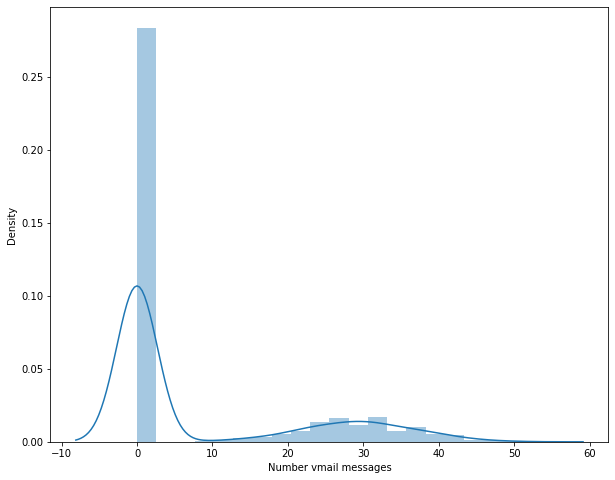

In [33]:
sns.distplot(telecom_df['Number vmail messages'])

In [34]:

pd.crosstab(telecom_df["Churn"], telecom_df["Number vmail messages"]).T

Churn,False,True
Number vmail messages,,
0,2008,403
4,1,0
8,2,0
9,2,0
10,1,0
11,2,0
12,6,0
13,4,0
14,7,0


we can observe that customer churn has increased as the "Number vmail messages" is more than 18. 

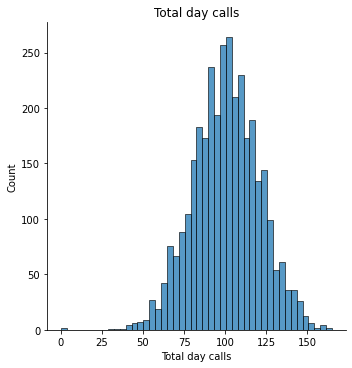

In [35]:
sns.displot(data=telecom_df, x="Total day calls")
plt.title('Total day calls')
plt.show()

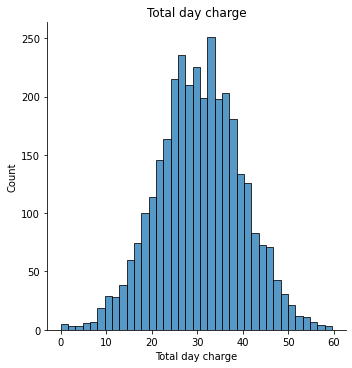

In [36]:
sns.displot(data=telecom_df, x="Total day charge")
plt.title('Total day charge')
plt.show()

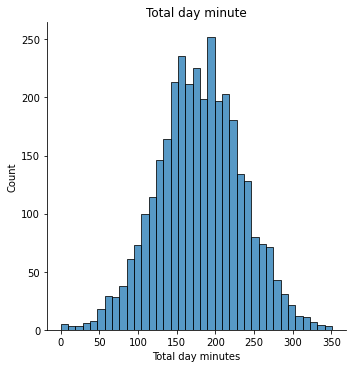

In [37]:
sns.displot(data=telecom_df, x="Total day minutes")
plt.title('Total day minute')
plt.show()

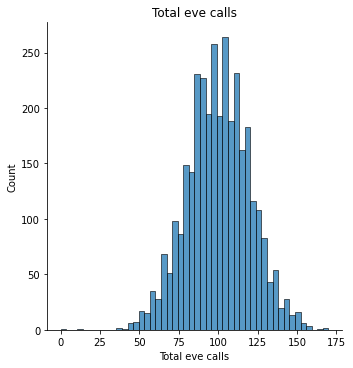

In [38]:
sns.displot(data=telecom_df, x="Total eve calls")
plt.title('Total eve calls')
plt.show()

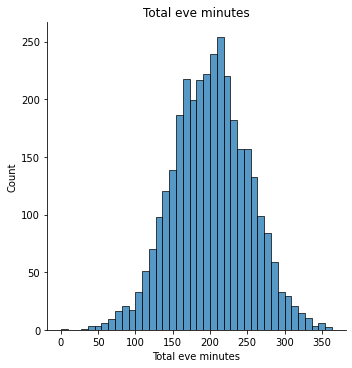

In [39]:
sns.displot(data=telecom_df, x="Total eve minutes")
plt.title('Total eve minutes')
plt.show()

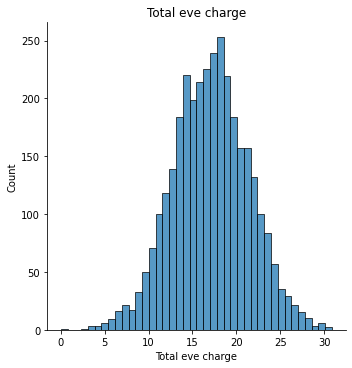

In [40]:
sns.displot(data=telecom_df, x="Total eve charge")
plt.title('Total eve charge')
plt.show()

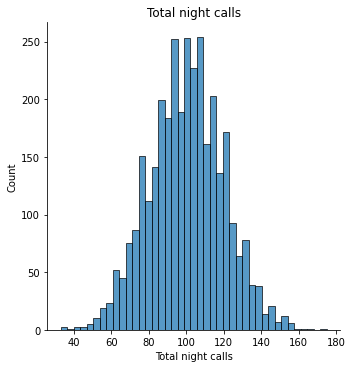

In [41]:
sns.displot(data=telecom_df, x="Total night calls")
plt.title('Total night calls')
plt.show()

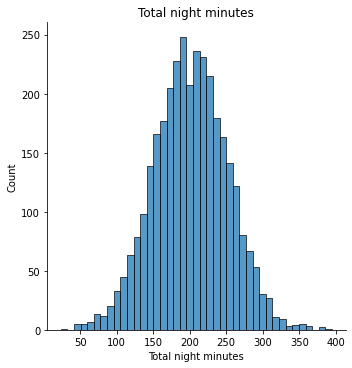

In [42]:
sns.displot(data=telecom_df, x="Total night minutes")
plt.title('Total night minutes')
plt.show()

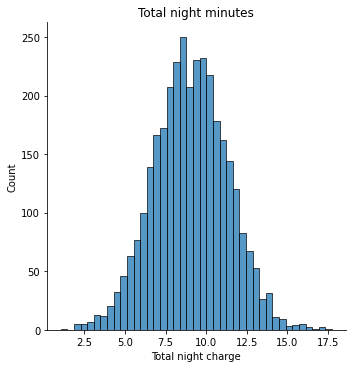

In [43]:
sns.displot(data=telecom_df, x="Total night charge")
plt.title('Total night minutes')
plt.show()

In [44]:
# create a new column total call per day
telecom_df['total_call_per_day'] = telecom_df['Total day calls'] +telecom_df['Total eve calls']+ telecom_df['Total night calls']

In [45]:
# create a new column total minutes spent
telecom_df['total_minutes_per_day'] = telecom_df['Total day minutes'] +telecom_df['Total eve minutes']+ telecom_df['Total night minutes']

In [46]:
# create a new column total_charge per day
telecom_df['total_charge_per_day'] = telecom_df['Total day charge'] +telecom_df['Total eve charge']+ telecom_df['Total night charge']